# パッケージの読み込み

In [1]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Meiryo'

# データの読み込み

- 性別データはダミー変数化処理済み

In [4]:
# データの配置場所
input_dir = 'C:/Users/rhira/Documents/GitHub'\
             '/signate-competition-Liver-disease-beginner/features'
# トレーニングデータ
train = pd.read_feather(os.path.join(input_dir[:], 'train_dummied_feature.feather'))
# テストデータ
test = pd.read_feather(os.path.join(input_dir[:], 'test_dummied_feature.feather'))

## データの表示

In [8]:
display(train, test)

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...
845,25,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,1
846,57,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,1
847,50,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,32,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male
0,25,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,1
1,26,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,0
2,64,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,1
3,65,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,1
4,34,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,0
...,...,...,...,...,...,...,...,...,...,...
345,65,0.913867,0.120555,214.354728,16.964820,28.723677,6.960649,3.505619,1.224655,0
346,59,0.818573,0.206075,215.898729,14.733461,20.470517,7.531071,3.637508,1.282833,1
347,25,0.787054,0.186129,214.167523,14.936585,20.589993,7.505128,3.619033,1.287256,1
348,64,0.725194,0.191307,220.272862,17.532595,48.115014,7.559414,3.635871,1.263348,1


## データの結合

In [15]:
df = pd.concat([train, test], axis=0).reset_index(drop=True)

# 特徴量エンジニアリング

## AST_GOTに関して

参考URL：https://www.kenpo.gr.jp/jfront-kenpo/contents/hoken/kenshinkekka/kenshinkekka_2-3.html

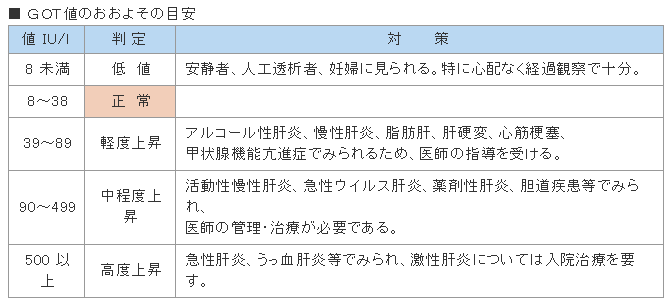

### ヒストグラム

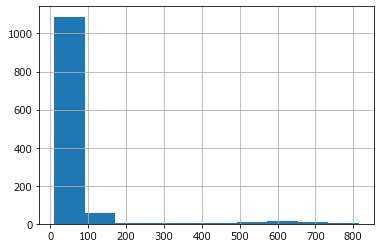

In [20]:
df['AST_GOT'].hist();

### スコア変数の追加

In [84]:
df['AST_GOT_score'] = 'normal'
df.loc[(df['AST_GOT'] < 8), 'AST_GOT_score'] = 'low'
df.loc[(8 <= df['AST_GOT']) & (df['AST_GOT'] <= 38), 'AST_GOT_score'] = 'normal'
df.loc[(39 <= df['AST_GOT']) & (df['AST_GOT'] <= 89), 'AST_GOT_score'] = 'little high'
df.loc[(90 <= df['AST_GOT']) & (df['AST_GOT'] <= 499), 'AST_GOT_score'] = 'middle high'
df.loc[(500 <= df['AST_GOT']), 'AST_GOT_score'] = 'high'

## ALT_GPTについて

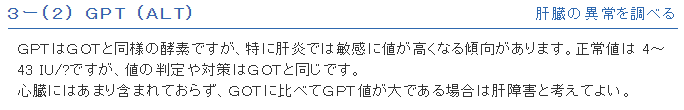

### ヒストグラム

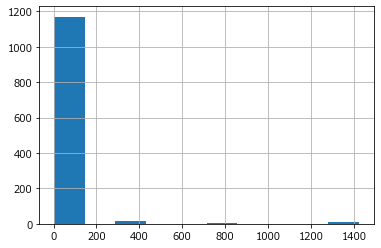

In [100]:
df['ALT_GPT'].hist();

### スコア変数の追加

In [90]:
df['ALT_GPT_score'] = 'normal'
df.loc[(df['ALT_GPT'] < 8), 'ALT_GPT_score'] = 'low'
df.loc[(8 <= df['ALT_GPT']) & (df['ALT_GPT'] <= 38), 'ALT_GPT_score'] = 'normal'
df.loc[(39 <= df['ALT_GPT']) & (df['ALT_GPT'] <= 89), 'ALT_GPT_score'] = 'little high'
df.loc[(90 <= df['ALT_GPT']) & (df['ALT_GPT'] <= 499), 'ALT_GPT_score'] = 'middle high'
df.loc[(500 <= df['ALT_GPT']), 'ALT_GPT_score'] = 'high'

### 肝疾患判定スコアの追加

In [92]:
df['eval_disease_GPT'] = 0
df.loc[(df['AST_GOT'] < df['ALT_GPT']), 'eval_disease_GPT'] = 1

## ALP

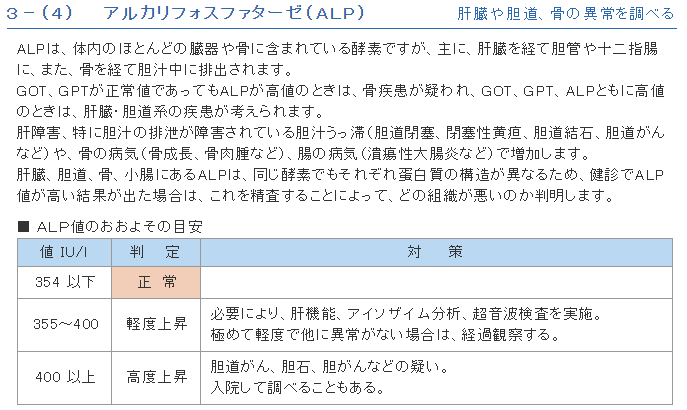

### ヒストグラム

<AxesSubplot:>

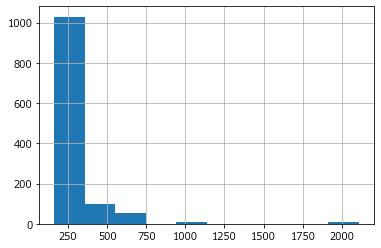

In [101]:
df['ALP'].hist()

### スコア変数の追加

In [103]:
df['ALP_core'] = 'normal'
df.loc[(df['ALP'] < 354), 'ALP_core'] = 'normal'
df.loc[(355 <= df['ALP']) & (df['ALP'] < 400), 'ALP_core'] = 'little high'
df.loc[(400 <= df['ALP']), 'ALP_core'] = 'high'

## TP
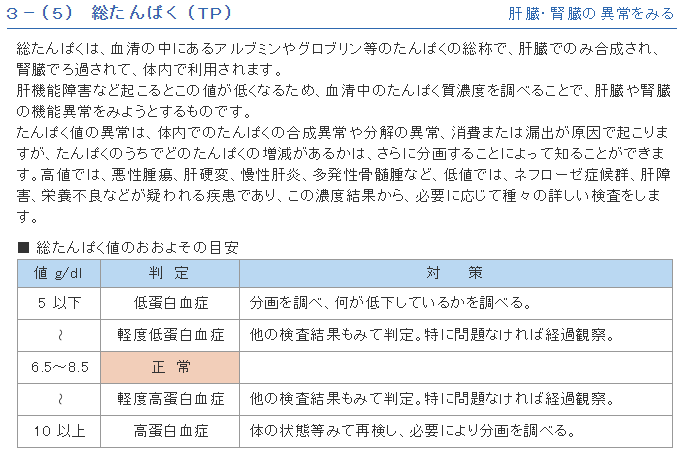

### ヒストグラム

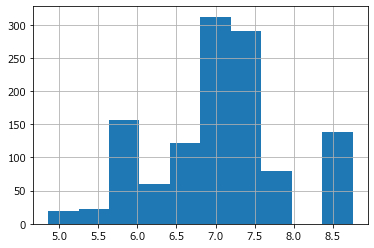

In [106]:
df['TP'].hist();

### スコア変数の追加

In [107]:
df['TP_score'] = 'normal'
df.loc[(df['TP'] <= 5), 'TP_score'] = 'low'
df.loc[(5 < df['TP']) & (df['TP'] <= 6.5), 'TP_score'] = 'little low'
df.loc[(6.5 < df['TP']) & (df['TP'] <= 8.5), 'TP_score'] = 'normal'
df.loc[(8.5 < df['TP']) & (df['TP'] <= 10), 'TP_score'] = 'middle high'
df.loc[(10 < df['TP']), 'TP_score'] = 'high'

## T-Bil

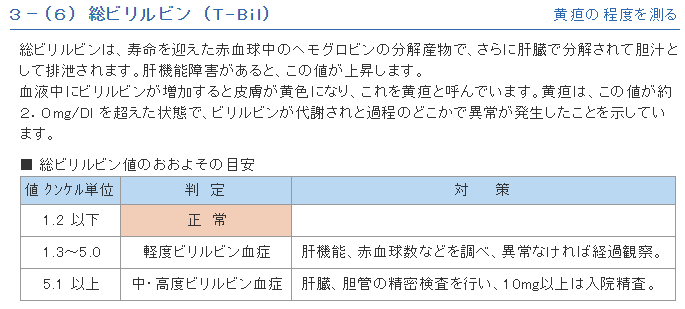

### ヒストグラム

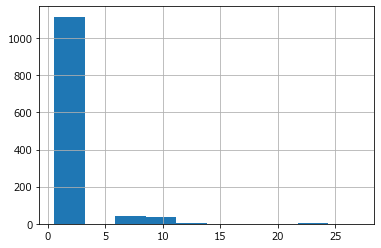

In [111]:
df['T_Bil'].hist();

### スコア変数の追加

In [112]:
df['T_Bil_score'] = 'normal'
df.loc[(df['T_Bil'] <= 1.2), 'T_Bil_score'] = 'normal'
df.loc[(1.3 <= df['T_Bil']) & (df['T_Bil'] <= 5.0), 'T_Bil_score'] = 'little high'
df.loc[(5.0 < df['T_Bil']) & (df['T_Bil'] <= 10.0), 'T_Bil_score'] = 'middle high'
df.loc[(10 < df['T_Bil']), 'T_Bil_score'] = 'high'

In [113]:
df

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Male,AST_GOT_score,ALT_GPT_score,eval_disease_GPT,ALP_core,TP_score,T_Bil_score
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,1,normal,normal,0,normal,normal,normal
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,little high,little high,0,normal,normal,normal
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,1,normal,normal,0,normal,little low,normal
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,little high,normal,0,little high,normal,normal
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,middle high,normal,0,normal,little low,little high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,65,0.913867,0.120555,214.354728,16.964820,28.723677,6.960649,3.505619,1.224655,0,normal,normal,0,normal,normal,normal
1196,59,0.818573,0.206075,215.898729,14.733461,20.470517,7.531071,3.637508,1.282833,1,normal,normal,0,normal,normal,normal
1197,25,0.787054,0.186129,214.167523,14.936585,20.589993,7.505128,3.619033,1.287256,1,normal,normal,0,normal,normal,normal
1198,64,0.725194,0.191307,220.272862,17.532595,48.115014,7.559414,3.635871,1.263348,1,little high,normal,0,normal,normal,normal


## Alb

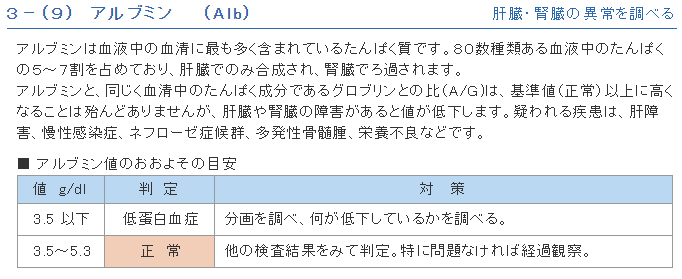

### ヒストグラム

In [115]:
df['Alb'].hist();

5.0169703930347005

In [ ]:
### スコア変数の追加